1) импорт данных и знакомство с переменными - выбросы, особенности, отсутствие данных
2) преобразуем данные и/или нагенерим данные из уже имеющихся
3) модель - выбор модели, применение, первые результаты
4) эвалюация - норм получилось нет?

In [1]:
import pandas as pd
import numpy as np
from empiricaldist import Cdf, Pmf
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
df_train = pd.read_csv('train.csv', index_col='PassengerId')

In [3]:
df_train

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


# Импорт и знакомство

In [4]:
((891 - 204) / 891)*100

77.10437710437711

In [5]:
# наши столбцы
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [6]:
df_train.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [7]:
# напишем небольшую функцию, которая принимает на вход ДФ + имя столбца, а возвращает value_counts + value_counts(normalize=True) для значений этого столбца
def value_counts_prc(df, col_name):
    pd_series = df[col_name]
    result = pd.concat([pd_series.value_counts(), pd_series.value_counts(normalize=True) * 100], axis = 1)
    result.columns = [col_name + '_cnt', col_name + '_%']
    return result

In [8]:
value_counts_prc_dict = {}
for col_name in df_train.columns:
    value_counts_prc_dict[col_name] = value_counts_prc(df_train, col_name)
    print(value_counts_prc(df_train, col_name))
    print('-' * 100)
    
    
# тут всё круто со столбцами Survived, Pclass, Sex, SibSp, Parch, Embarked (тут 2 отсутствующих значения)
# нужно рассмотреть плотность распределения Age (714 non-null, 80.1%, которые делятся на 88 повторяющихся значений) и Fare
# выглядят не репрезентативно и требуют преобразований поля Name, Ticket, Cabin (204 non-null, 22.9%)

   Survived_cnt  Survived_%
0           549   61.616162
1           342   38.383838
----------------------------------------------------------------------------------------------------
   Pclass_cnt   Pclass_%
3         491  55.106622
1         216  24.242424
2         184  20.650954
----------------------------------------------------------------------------------------------------
                                                  Name_cnt    Name_%
Crease, Mr. Ernest James                                 1  0.112233
Duane, Mr. Frank                                         1  0.112233
Panula, Master. Urho Abraham                             1  0.112233
Chambers, Mrs. Norman Campbell (Bertha Griggs)           1  0.112233
Healy, Miss. Hanora "Nora"                               1  0.112233
...                                                    ...       ...
Beckwith, Mrs. Richard Leonard (Sallie Monypeny)         1  0.112233
Dennis, Mr. Samuel                                       1  0.

Text(0, 0.5, 'PMF')

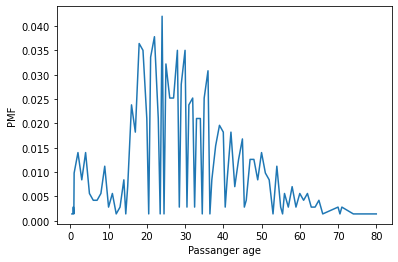

In [9]:
# рассмотрим плотности распределения
Pmf.from_seq(list(df_train['Age'])).plot()
plt.xlabel('Passanger age')
plt.ylabel('PMF')

<AxesSubplot:xlabel='Age', ylabel='Density'>

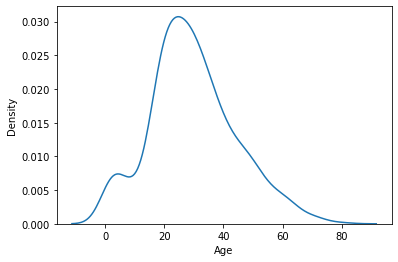

In [10]:
sns.kdeplot(df_train['Age'])

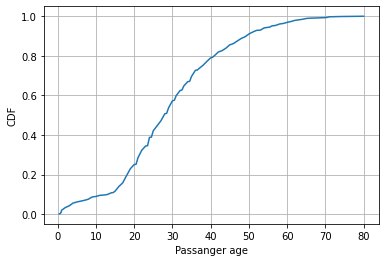

In [11]:
# рассмотрим накопительные плотности распределения
cdf_age = Cdf.from_seq(list(df_train['Age']))
cdf_age.plot()
plt.xlabel('Passanger age')
plt.ylabel('CDF')
# plt.plot(14, cdf_age[14], 'rd')
# plt.plot(28, cdf_age[28], 'rd')
# plt.plot(45, cdf_age[45], 'rd')
plt.grid()

In [12]:
def show_pmf_cdf_plots(df, col_name):
    Pmf.from_seq(list(df[col_name])).plot(alpha=0.5)
    plt.xlabel(col_name)
    plt.ylabel('PMF')
    
    sns.kdeplot(df[col_name])
    plt.show()
    
    cdf_age = Cdf.from_seq(list(df[col_name]))
    cdf_age.plot()
    plt.xlabel(col_name)
    plt.ylabel('CDF')
    plt.grid()
    plt.show()

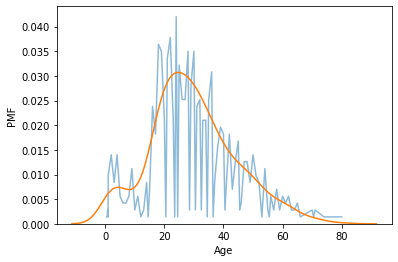

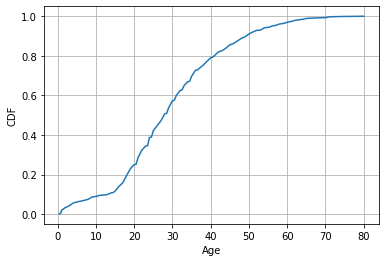

In [13]:
show_pmf_cdf_plots(df_train, 'Age')

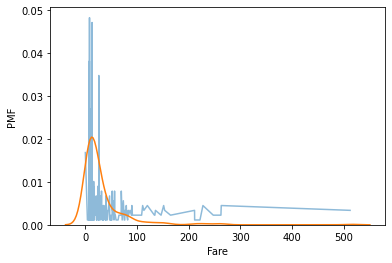

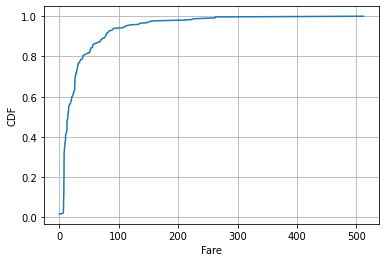

In [14]:
show_pmf_cdf_plots(df_train, 'Fare')

# Добавление данных

In [15]:
# шаманим с именем. Пробуем достать части слов в словарь
dict_name_parts = {}
for name in df_train['Name']:
    name_parts = name.split(' ')
    for name_part in name_parts:
        if name_part not in dict_name_parts.keys():
            dict_name_parts[name_part] = 1
        else:
            dict_name_parts[name_part] += 1

In [16]:
# преобразуем этот словарь в датафрейм
df_name_parts = pd.DataFrame.from_dict(dict_name_parts, orient='index')
df_name_parts = df_name_parts.reset_index()
df_name_parts.columns = ['name_part', 'cnt']

# добавляем поле part_consist_dot чтобы посмотреть на все поля, где есть точка
df_name_parts['part_consist_dot'] = df_name_parts['name_part'].apply(lambda x: 1 if '.' in x else 0)
df_name_parts[df_name_parts['part_consist_dot'] == 1]

# наверное первые 4 строчки можно преобразовать в отдельную переменную
# df_name_parts.sort_values('cnt', ascending=False)

,name_part,cnt,part_consist_dot
1,Mr.,517,1
5,Mrs.,125,1
12,Miss.,182,1
29,Master.,40,1
100,Don.,1,1
380,Rev.,6,1
576,Dr.,7,1
813,Mme.,1,1
948,Ms.,1,1
960,Major.,2,1


In [17]:
name_part_to_df = []
want_to_add_parts = ['Mr.', 'Mrs.', 'Miss.', 'Master.', 'Dr.']
for p_name in df_train['Name']:
    counter = 0
    for name_part in want_to_add_parts:
        if name_part in p_name:
            name_part_to_df.append(name_part)
            continue
        else:
            counter += 1
            if counter == len(want_to_add_parts):
                name_part_to_df.append('no_name_part')

In [18]:
df_train['name_part'] = name_part_to_df
df_train

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,name_part
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr.
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs.
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss.
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs.
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr.
...,...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,no_name_part
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Miss.
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,Miss.


In [19]:
df_train.Cabin.value_counts()

G6             4
C23 C25 C27    4
B96 B98        4
F33            3
C22 C26        3
              ..
A6             1
C128           1
D49            1
C70            1
C148           1
Name: Cabin, Length: 147, dtype: int64

In [20]:
type(np.nan)

float

In [21]:
# попробуем достать букву кабины. Может это повлияет на выживаемость
cab_num_for_df = []

for cab_num in df_train.Cabin:
    if type(cab_num) == type(np.nan):
        cab_num_for_df.append('N')
    else:
        cab_num_for_df.append(cab_num.split(' ')[0][0])

In [22]:
df_train['cabin_letter'] = cab_num_for_df
df_train

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,name_part,cabin_letter
PassengerId,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr.,N
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs.,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss.,N
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs.,C
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr.,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,no_name_part,N
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Miss.,B
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,Miss.,N


In [23]:
# Кодируем мужчин в 0, женщин в 1
df_train['Sex_binary'] = df_train['Sex'].map({'male':0, 'female':1})
df_train

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,name_part,cabin_letter,Sex_binary
PassengerId,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr.,N,0
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs.,C,1
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss.,N,1
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs.,C,1
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr.,N,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,no_name_part,N,0
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Miss.,B,1
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,Miss.,N,1


# Изменение данных

In [24]:
# копирую, чтобы осталась изначальная копия
df_train_initial = pd.DataFrame(df_train)

In [25]:
value_counts_prc_dict['Embarked']

,Embarked_cnt,Embarked_%
S,644,72.440945
C,168,18.897638
Q,77,8.661417


In [26]:
# в два отсутствующих значения тупо проставляю S
df_train['Embarked'] = df_train['Embarked'].fillna('S')
df_train.Embarked.value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [27]:
mean_age = round(df_train.Age.mean(),0)
mean_age

30.0

In [28]:
value_counts_prc(df_train, 'name_part')

,name_part_cnt,name_part_%
Mr.,517,58.024691
Miss.,182,20.426487
Mrs.,125,14.029181
Master.,40,4.489338
no_name_part,20,2.244669
Dr.,7,0.785634


In [29]:
df_train[['name_part', 'Age', 'Pclass']].groupby('name_part').agg({'Pclass':'count','Age':'mean'}).reset_index()

,name_part,Pclass,Age
0,Dr.,7,42.000000
1,Master.,40,4.574167
2,Miss.,182,21.773973
3,Mr.,517,32.368090
4,Mrs.,125,35.898148
5,no_name_part,20,42.500000


In [30]:
# что за маленькие значения по master?
df_train[df_train['name_part'] == 'Master.']

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,name_part,cabin_letter,Sex_binary
PassengerId,,,,,,,,,,,,,,
8,0,3,"Palsson, Master. Gosta Leonard",male,2.00,3,1,349909,21.0750,NaN,S,Master.,N,0
17,0,3,"Rice, Master. Eugene",male,2.00,4,1,382652,29.1250,NaN,Q,Master.,N,0
51,0,3,"Panula, Master. Juha Niilo",male,7.00,4,1,3101295,39.6875,NaN,S,Master.,N,0
60,0,3,"Goodwin, Master. William Frederick",male,11.00,5,2,CA 2144,46.9000,NaN,S,Master.,N,0
64,0,3,"Skoog, Master. Harald",male,4.00,3,2,347088,27.9000,NaN,S,Master.,N,0
66,1,3,"Moubarek, Master. Gerios",male,NaN,1,1,2661,15.2458,NaN,C,Master.,N,0
79,1,2,"Caldwell, Master. Alden Gates",male,0.83,0,2,248738,29.0000,NaN,S,Master.,N,0
126,1,3,"Nicola-Yarred, Master. Elias",male,12.00,1,0,2651,11.2417,NaN,C,Master.,N,0
160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.5500,NaN,S,Master.,N,0


In [31]:
df_train[df_train['Age'].isnull()]['name_part'].value_counts()

Mr.        119
Miss.       36
Mrs.        17
Master.      4
Dr.          1
Name: name_part, dtype: int64

In [32]:
mean_age_dict = df_train[['name_part', 'Age']].groupby('name_part').agg({'Age':'mean'}).to_dict(orient='dict')['Age']
mean_age_dict

{'Dr.': 42.0,
 'Master.': 4.574166666666667,
 'Miss.': 21.773972602739725,
 'Mr.': 32.368090452261306,
 'Mrs.': 35.898148148148145,
 'no_name_part': 42.5}

In [33]:
df_train['Age_no_nan'] = df_train.apply(lambda row: mean_age_dict[row['name_part']] if np.isnan(row['Age']) else row['Age'], axis=1)
# круто, можно делать .apply на целый DF. Прям крутая фишка

In [34]:
(df_train[df_train['Age'].notnull()].Age	== df_train[df_train['Age'].notnull()].Age_no_nan).value_counts()
# кул, совпадают, когда .notnull()

True    714
dtype: int64

In [35]:
df_train[df_train['Age'].isnull()][['name_part', 'Age_no_nan']]
# тут вроде тоже всё ок

,name_part,Age_no_nan
PassengerId,,
6,Mr.,32.368090
18,Mr.,32.368090
20,Mrs.,35.898148
27,Mr.,32.368090
29,Miss.,21.773973
...,...,...
860,Mr.,32.368090
864,Miss.,21.773973
869,Mr.,32.368090


In [36]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Survived      891 non-null    int64  
 1   Pclass        891 non-null    int64  
 2   Name          891 non-null    object 
 3   Sex           891 non-null    object 
 4   Age           714 non-null    float64
 5   SibSp         891 non-null    int64  
 6   Parch         891 non-null    int64  
 7   Ticket        891 non-null    object 
 8   Fare          891 non-null    float64
 9   Cabin         204 non-null    object 
 10  Embarked      891 non-null    object 
 11  name_part     891 non-null    object 
 12  cabin_letter  891 non-null    object 
 13  Sex_binary    891 non-null    int64  
 14  Age_no_nan    891 non-null    float64
dtypes: float64(3), int64(5), object(7)
memory usage: 111.4+ KB


# Модель

### преобразование данных для модели дерево решений т.к. оно не может работать с номинальными данными

In [37]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore')

In [38]:
df_train_for_model = df_train[['Survived', 'Pclass', 'SibSp', 'Parch', 'Fare', 'Embarked', 'name_part', 'cabin_letter', 'Sex_binary', 'Age_no_nan']].copy()
df_train_for_model

,Survived,Pclass,SibSp,Parch,Fare,Embarked,name_part,cabin_letter,Sex_binary,Age_no_nan
PassengerId,,,,,,,,,,
1,0,3,1,0,7.2500,S,Mr.,N,0,22.000000
2,1,1,1,0,71.2833,C,Mrs.,C,1,38.000000
3,1,3,0,0,7.9250,S,Miss.,N,1,26.000000
4,1,1,1,0,53.1000,S,Mrs.,C,1,35.000000
5,0,3,0,0,8.0500,S,Mr.,N,0,35.000000
...,...,...,...,...,...,...,...,...,...,...
887,0,2,0,0,13.0000,S,no_name_part,N,0,27.000000
888,1,1,0,0,30.0000,S,Miss.,B,1,19.000000
889,0,3,1,2,23.4500,S,Miss.,N,1,21.773973


In [39]:
enc.fit(df_train_for_model['Embarked'])

ValueError: Expected 2D array, got 1D array instead:
array=['S' 'C' 'S' 'S' 'S' 'Q' 'S' 'S' 'S' 'C' 'S' 'S' 'S' 'S' 'S' 'S' 'Q' 'S'
 'S' 'C' 'S' 'S' 'Q' 'S' 'S' 'S' 'C' 'S' 'Q' 'S' 'C' 'C' 'Q' 'S' 'C' 'S'
 'C' 'S' 'S' 'C' 'S' 'S' 'C' 'C' 'Q' 'S' 'Q' 'Q' 'C' 'S' 'S' 'S' 'C' 'S'
 'C' 'S' 'S' 'C' 'S' 'S' 'C' 'S' 'S' 'S' 'C' 'C' 'S' 'S' 'S' 'S' 'S' 'S'
 'S' 'C' 'S' 'S' 'S' 'S' 'S' 'S' 'S' 'S' 'Q' 'S' 'S' 'S' 'S' 'S' 'S' 'S'
 'S' 'S' 'S' 'S' 'S' 'S' 'C' 'C' 'S' 'S' 'S' 'S' 'S' 'S' 'S' 'S' 'S' 'S'
 'S' 'Q' 'S' 'C' 'S' 'S' 'C' 'S' 'Q' 'S' 'C' 'S' 'S' 'S' 'C' 'S' 'S' 'C'
 'Q' 'S' 'C' 'S' 'C' 'S' 'S' 'S' 'S' 'C' 'S' 'S' 'S' 'C' 'C' 'S' 'S' 'Q'
 'S' 'S' 'S' 'S' 'S' 'S' 'S' 'S' 'S' 'S' 'S' 'C' 'Q' 'S' 'S' 'S' 'S' 'S'
 'S' 'S' 'S' 'S' 'S' 'S' 'S' 'S' 'S' 'Q' 'S' 'S' 'C' 'S' 'S' 'C' 'S' 'S'
 'S' 'C' 'S' 'S' 'S' 'S' 'Q' 'S' 'Q' 'S' 'S' 'S' 'S' 'S' 'C' 'C' 'Q' 'S'
 'Q' 'S' 'S' 'S' 'S' 'C' 'S' 'S' 'S' 'C' 'Q' 'C' 'S' 'S' 'S' 'S' 'Q' 'C'
 'S' 'S' 'C' 'S' 'S' 'S' 'S' 'S' 'S' 'S' 'S' 'S' 'S' 'S' 'S' 'S' 'S' 'S'
 'S' 'S' 'S' 'S' 'S' 'S' 'C' 'Q' 'S' 'S' 'C' 'Q' 'S' 'S' 'S' 'S' 'S' 'S'
 'S' 'S' 'S' 'C' 'C' 'S' 'C' 'S' 'Q' 'S' 'S' 'S' 'Q' 'S' 'S' 'S' 'S' 'S'
 'S' 'S' 'S' 'C' 'Q' 'S' 'S' 'S' 'Q' 'S' 'Q' 'S' 'S' 'S' 'S' 'C' 'S' 'S'
 'S' 'Q' 'S' 'C' 'C' 'S' 'S' 'C' 'C' 'S' 'S' 'C' 'Q' 'Q' 'S' 'Q' 'S' 'S'
 'C' 'C' 'C' 'C' 'C' 'C' 'S' 'S' 'S' 'S' 'S' 'S' 'S' 'C' 'S' 'S' 'Q' 'S'
 'S' 'C' 'S' 'S' 'S' 'C' 'Q' 'S' 'S' 'S' 'S' 'S' 'S' 'C' 'S' 'S' 'S' 'S'
 'S' 'S' 'S' 'S' 'S' 'S' 'S' 'S' 'S' 'S' 'C' 'S' 'C' 'S' 'S' 'S' 'Q' 'Q'
 'S' 'C' 'C' 'S' 'Q' 'S' 'C' 'C' 'Q' 'C' 'C' 'S' 'S' 'C' 'S' 'C' 'S' 'C'
 'C' 'S' 'C' 'C' 'S' 'S' 'S' 'S' 'S' 'S' 'Q' 'C' 'S' 'S' 'S' 'C' 'S' 'S'
 'S' 'S' 'S' 'S' 'S' 'S' 'S' 'S' 'S' 'S' 'S' 'S' 'S' 'S' 'S' 'Q' 'Q' 'S'
 'S' 'S' 'S' 'S' 'S' 'S' 'C' 'Q' 'S' 'S' 'S' 'S' 'S' 'S' 'Q' 'S' 'S' 'S'
 'S' 'S' 'S' 'S' 'S' 'S' 'S' 'S' 'S' 'S' 'S' 'S' 'S' 'S' 'S' 'S' 'C' 'S'
 'S' 'S' 'C' 'C' 'S' 'C' 'S' 'S' 'S' 'Q' 'S' 'S' 'S' 'S' 'S' 'S' 'S' 'S'
 'Q' 'C' 'S' 'S' 'S' 'C' 'S' 'S' 'S' 'S' 'S' 'S' 'S' 'S' 'S' 'S' 'C' 'S'
 'S' 'C' 'S' 'S' 'S' 'S' 'S' 'C' 'S' 'C' 'C' 'S' 'S' 'S' 'S' 'Q' 'Q' 'S'
 'S' 'C' 'S' 'S' 'S' 'S' 'Q' 'S' 'S' 'C' 'S' 'S' 'S' 'Q' 'S' 'S' 'S' 'S'
 'C' 'C' 'C' 'Q' 'S' 'S' 'S' 'S' 'S' 'C' 'C' 'C' 'S' 'S' 'S' 'C' 'S' 'C'
 'S' 'S' 'S' 'S' 'C' 'S' 'S' 'C' 'S' 'S' 'C' 'S' 'Q' 'C' 'S' 'S' 'C' 'C'
 'S' 'S' 'Q' 'S' 'S' 'S' 'S' 'S' 'S' 'S' 'C' 'S' 'S' 'S' 'S' 'Q' 'S' 'S'
 'S' 'S' 'C' 'S' 'S' 'C' 'S' 'C' 'C' 'S' 'S' 'C' 'S' 'S' 'S' 'C' 'S' 'Q'
 'S' 'S' 'S' 'S' 'C' 'C' 'S' 'S' 'S' 'S' 'C' 'S' 'S' 'S' 'C' 'S' 'S' 'S'
 'Q' 'Q' 'S' 'S' 'S' 'S' 'S' 'S' 'C' 'S' 'C' 'S' 'S' 'S' 'Q' 'S' 'S' 'Q'
 'S' 'S' 'C' 'S' 'S' 'S' 'S' 'S' 'S' 'S' 'S' 'C' 'S' 'S' 'C' 'C' 'S' 'C'
 'S' 'S' 'S' 'S' 'S' 'Q' 'Q' 'S' 'S' 'Q' 'S' 'C' 'S' 'C' 'S' 'S' 'S' 'S'
 'S' 'S' 'S' 'S' 'S' 'S' 'S' 'S' 'S' 'S' 'S' 'S' 'S' 'C' 'Q' 'C' 'S' 'S'
 'S' 'C' 'S' 'S' 'S' 'S' 'S' 'C' 'S' 'C' 'S' 'S' 'S' 'Q' 'C' 'S' 'C' 'S'
 'C' 'Q' 'S' 'S' 'S' 'S' 'S' 'C' 'C' 'S' 'S' 'S' 'S' 'S' 'C' 'S' 'Q' 'S'
 'S' 'S' 'S' 'S' 'S' 'S' 'S' 'Q' 'S' 'S' 'S' 'C' 'S' 'S' 'S' 'S' 'S' 'C'
 'S' 'S' 'S' 'S' 'C' 'S' 'S' 'S' 'S' 'S' 'S' 'Q' 'S' 'S' 'S' 'S' 'S' 'S'
 'S' 'S' 'S' 'S' 'S' 'S' 'C' 'S' 'S' 'S' 'C' 'Q' 'Q' 'S' 'S' 'S' 'S' 'C'
 'S' 'S' 'Q' 'S' 'Q' 'S' 'C' 'S' 'S' 'S' 'S' 'S' 'S' 'Q' 'S' 'C' 'Q' 'S'
 'S' 'C' 'S' 'S' 'S' 'S' 'C' 'S' 'S' 'S' 'S' 'C' 'S' 'S' 'S' 'S' 'S' 'S'
 'S' 'S' 'S' 'S' 'S' 'S' 'S' 'C' 'S' 'S' 'S' 'S' 'S' 'S' 'S' 'Q' 'S' 'C'
 'Q' 'S' 'C' 'S' 'C' 'S' 'S' 'C' 'S' 'S' 'S' 'C' 'S' 'S' 'C' 'C' 'S' 'S'
 'S' 'C' 'S' 'C' 'S' 'S' 'C' 'S' 'S' 'S' 'S' 'S' 'C' 'C' 'S' 'S' 'S' 'S'
 'S' 'S' 'C' 'S' 'S' 'S' 'S' 'S' 'S' 'S' 'C' 'C' 'S' 'S' 'S' 'C' 'S' 'S'
 'S' 'S' 'S' 'Q' 'S' 'S' 'S' 'C' 'Q'].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [41]:
df_train_for_model = pd.get_dummies(df_train_for_model, prefix=['Embarked'], columns = ['Embarked'])
df_train_for_model = pd.get_dummies(df_train_for_model, prefix=['name_part'], columns = ['name_part'])
df_train_for_model = pd.get_dummies(df_train_for_model, prefix=['cabin_letter'], columns = ['cabin_letter'])

In [42]:
df_train_for_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Survived                891 non-null    int64  
 1   Pclass                  891 non-null    int64  
 2   SibSp                   891 non-null    int64  
 3   Parch                   891 non-null    int64  
 4   Fare                    891 non-null    float64
 5   Sex_binary              891 non-null    int64  
 6   Age_no_nan              891 non-null    float64
 7   Embarked_C              891 non-null    uint8  
 8   Embarked_Q              891 non-null    uint8  
 9   Embarked_S              891 non-null    uint8  
 10  name_part_Dr.           891 non-null    uint8  
 11  name_part_Master.       891 non-null    uint8  
 12  name_part_Miss.         891 non-null    uint8  
 13  name_part_Mr.           891 non-null    uint8  
 14  name_part_Mrs.          891 non-null    ui

### деление на вопросы и ответы

In [44]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [59]:
feature_cols = df_train_for_model.columns[1:]
y = df_train_for_model['Survived']
X = df_train_for_model[feature_cols]
X.columns

Index(['Pclass', 'SibSp', 'Parch', 'Fare', 'Sex_binary', 'Age_no_nan',
       'Embarked_C', 'Embarked_Q', 'Embarked_S', 'name_part_Dr.',
       'name_part_Master.', 'name_part_Miss.', 'name_part_Mr.',
       'name_part_Mrs.', 'name_part_no_name_part', 'cabin_letter_A',
       'cabin_letter_B', 'cabin_letter_C', 'cabin_letter_D', 'cabin_letter_E',
       'cabin_letter_F', 'cabin_letter_G', 'cabin_letter_N', 'cabin_letter_T'],
      dtype='object')

In [46]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [47]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [53]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("F1:",metrics.f1_score(y_test, y_pred))


Accuracy: 0.75
Recall: 0.6608695652173913
Precision: 0.7307692307692307
F1: 0.6940639269406393


In [62]:
!pip3 install graphviz
!pip install pydotplus

In [56]:
!pip install sklearn

Using legacy 'setup.py install' for sklearn, since package 'wheel' is not installed.
    Running setup.py install for sklearn: started
    Running setup.py install for sklearn: finished with status 'done'


In [65]:
from six import StringIO
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())

InvocationException: GraphViz's executables not found

In [46]:
# можно посмотреть взаимоотношение каждой переменной к таргетной
sub_df = df_train[['Survived', 'Sex']]
sub_df['cnt_col'] = 1
print('выжившие М Ж 1')
print(sub_df.groupby(['Survived', 'Sex']).count().reset_index())

выжившие М Ж 1
   Survived     Sex  cnt_col
0         0  female       81
1         0    male      468
2         1  female      233
3         1    male      109


<ipython-input-46-291a4e761fa4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_df['cnt_col'] = 1
